In [1]:
import pickle 
import networkx as nx 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.cm as cm
from empath import Empath
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import pyLDAvis
import pyLDAvis.gensim
import operator
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout
import random

In [2]:
def drawUserGraph(graph):
    ugraph = graph
    pos = graphviz_layout(ugraph, prog='neato')

    usr = ugraph.nodes()
    print len(usr)
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in ugraph:
        c = usr.index(node)
        colorMap.append(color[c])
        lls[node] = node
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    #
    nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

In [3]:
SW_Graphs_file = "/work/sagarj/Work/node2vec/graph/SW_ugraph.pkl"

In [4]:
SW_Graphs= pickle.load(open(SW_Graphs_file,'rb'))

In [5]:
len(SW_Graphs)

10157

In [76]:
BPUserDict = pickle.load(open("BpUserDict.pkl",'rb'))

In [77]:
BPUserDict

{'vj5co': [u'zombiemeds'],
 '1uv2vj': [],
 'fjatc': [u'dead_by_saturday'],
 '1x6boy': [u'throwawayacct424'],
 '97akw': [u'[deleted]', u'PossiblePerson'],
 '3ci391': [u'peanutpeepz'],
 's79sc': [u'fuck_usernames123'],
 '2tjz9s': [u'BearDidIt'],
 'b0mvj': [u'itisover'],
 '2u23m8': [],
 'e9cx6': [],
 'mae5s': [],
 'ci9lz': [u'dontwannabehere'],
 '24gto5': [u'youcaughtthelight'],
 'dwd3s': [],
 '29en0c': [u'Ingvarkarlsson', u'throwawaybcirl'],
 '37zjrf': [u'pathfinder89'],
 '1cz1sd': [u'KimmyJongJong'],
 '2nnud5': [],
 '2wo3jj': [u'throwitbitch1'],
 '1h1vqu': [u'nopointnow', u'rainbowtwinkies'],
 '16hiex': [u'griffin_desantos'],
 'e1hjc': [u'[deleted]'],
 'osxp1': [u'bleepitybleep', u'[deleted]', u'skekze'],
 '2kpspy': [u'bktolife', u'Hasherss', u'Starship_Fighter'],
 '2lhvye': [],
 '2at60d': [u'Jessica-EdgeBlade'],
 '1p4pqm': [u'TMRobotic'],
 'ylt41': [],
 '2hip0u': [u'Missing_love'],
 'xwu8q': [u'1800HEYGTFO'],
 '1dqizr': [u'buba_fett'],
 '1jg4bt': [u'dudelikeshismusic', u'[deleted]'],
 

5


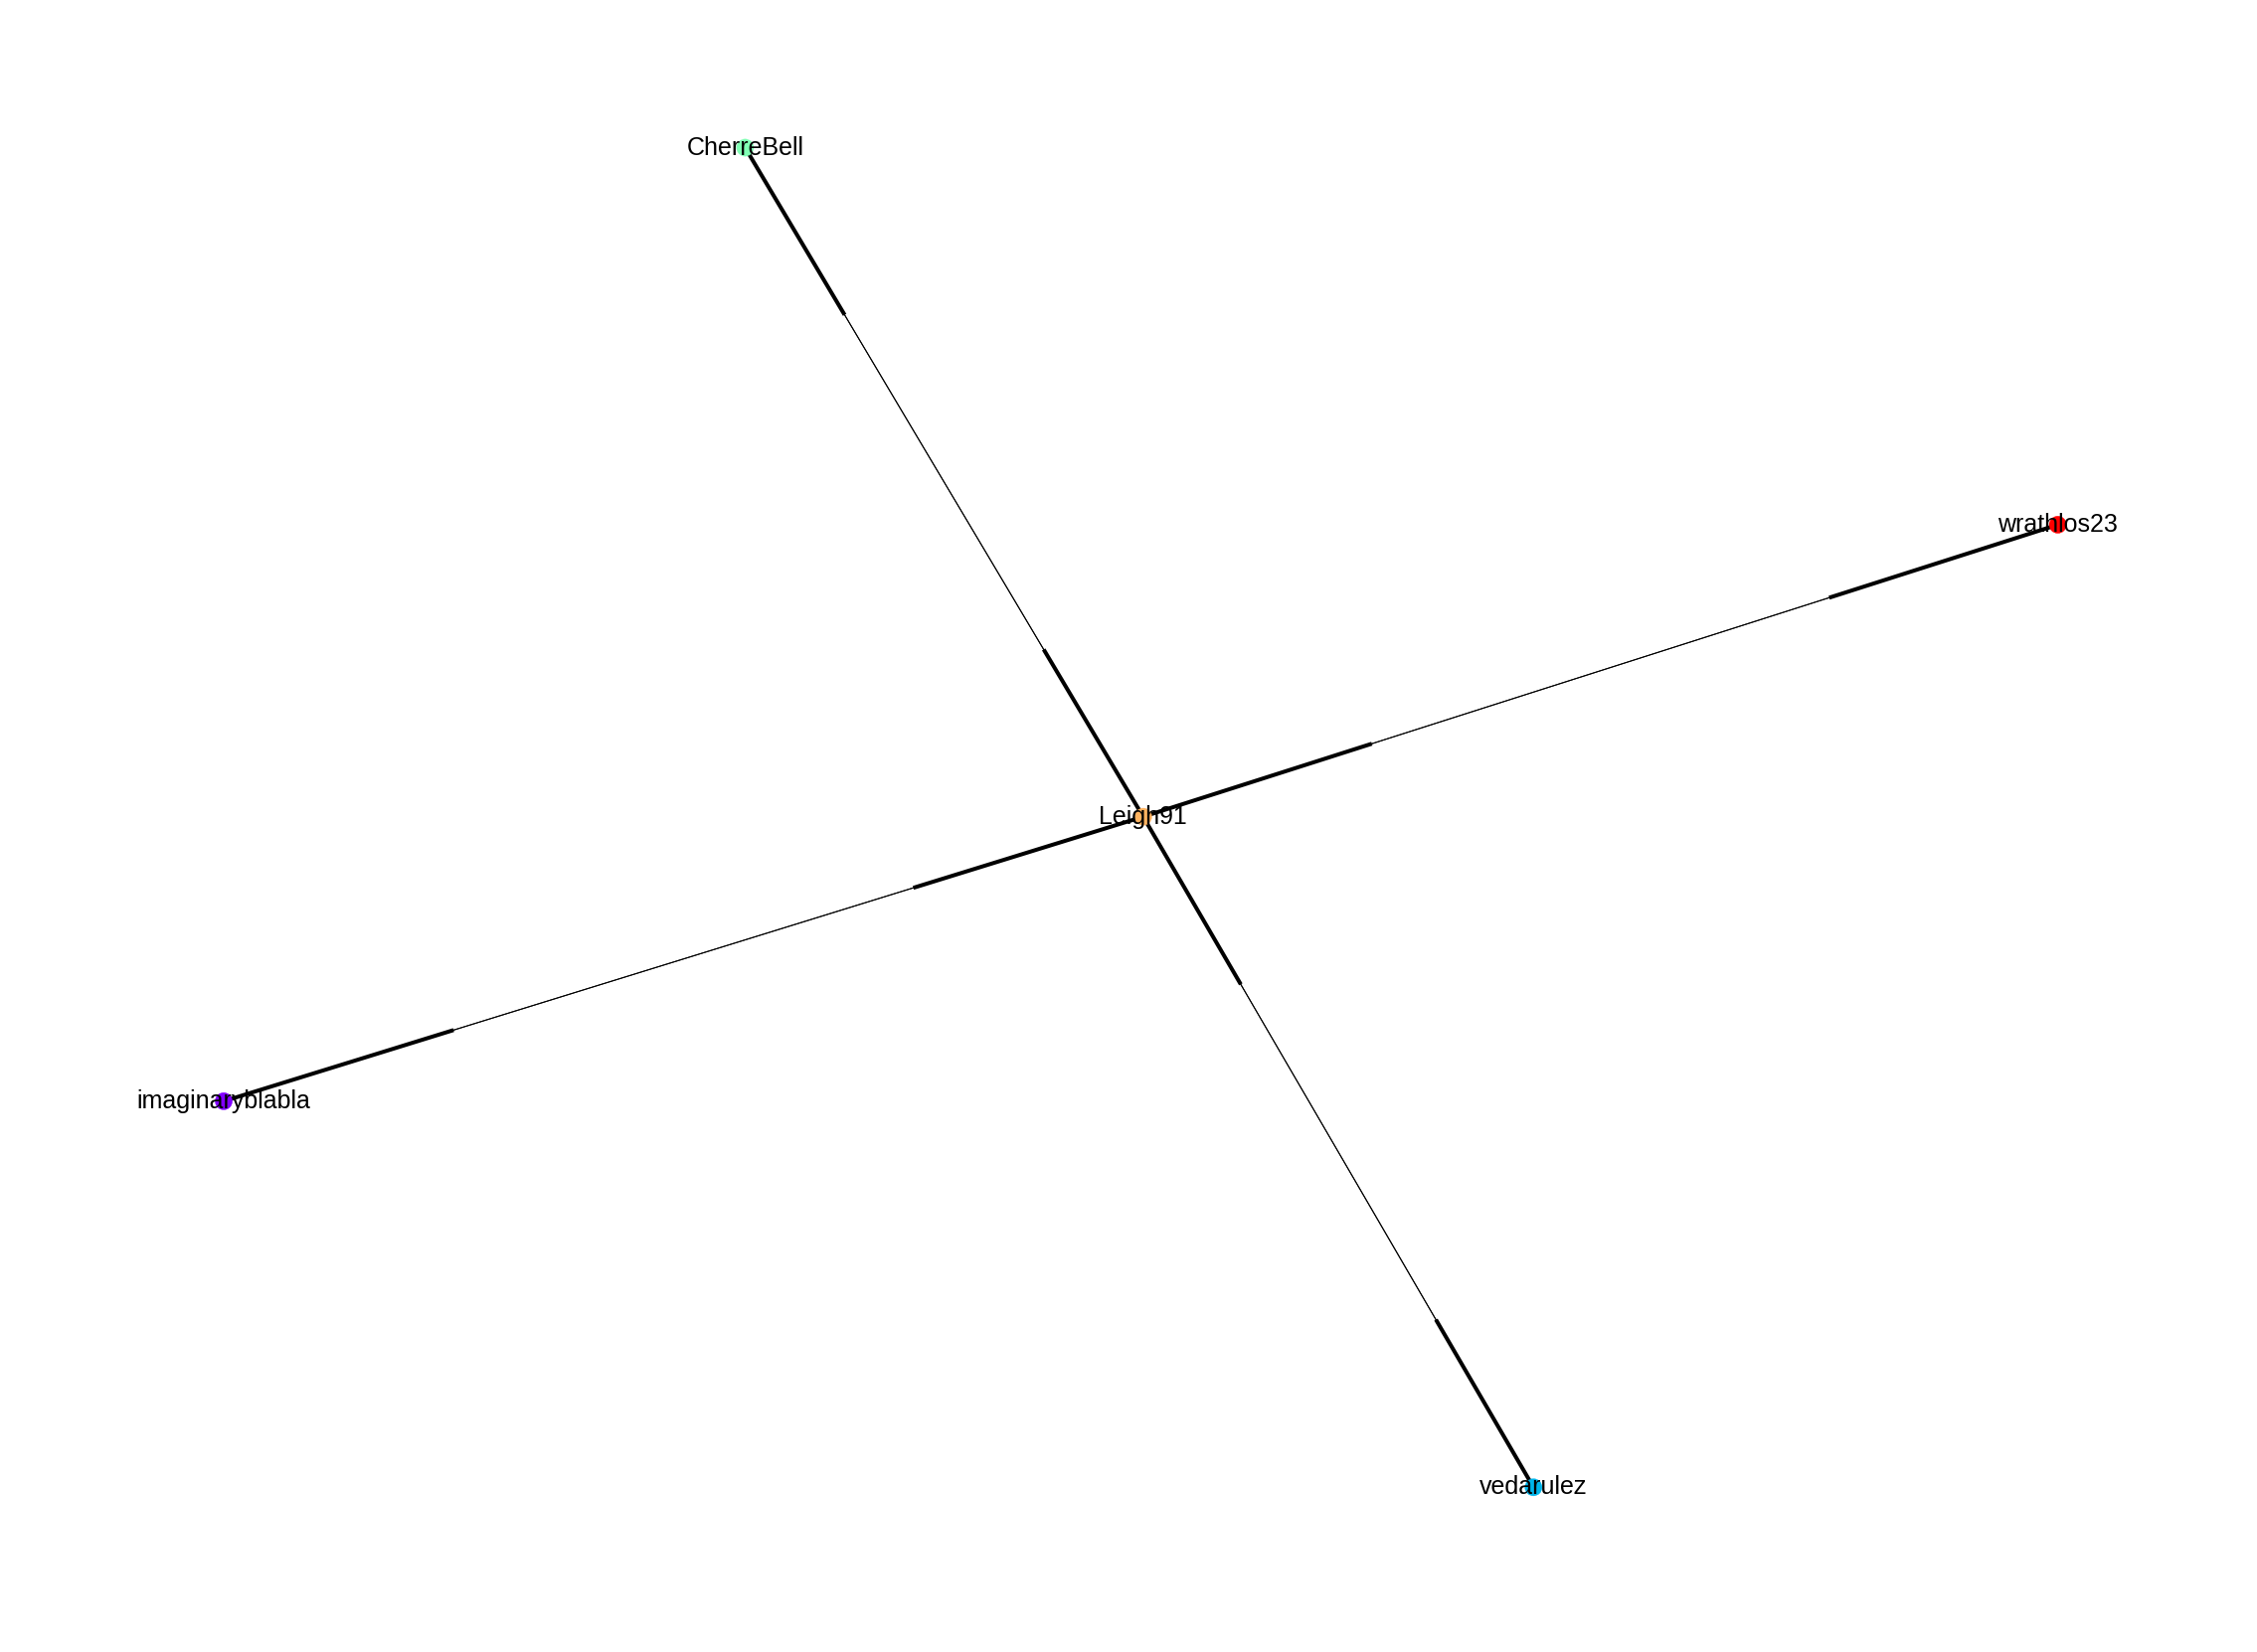

In [81]:
drawUserGraph(SW_Graphs['2swq8m'])

In [9]:
EmbeddingDir = "/work/sagarj/Work/node2vec/emb/"

In [10]:
embeddings = os.listdir(EmbeddingDir)

In [11]:
embeddingDict = {}
for emb in embeddings:
    embId = emb.split('.')[0]
    embeddingDict[embId] = EmbeddingDir + emb

In [12]:
commonKeys = [k for k in embeddingDict if k in SW_Graphs and k in BPUserDict ]

In [13]:
len(commonKeys)

10133

In [14]:
sample = pd.read_csv(embeddingDict[commonKeys[1]],sep=' ')

In [15]:
sample

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,5,128
sadsexthrowaway,-0.018484,0.008159,0.092687,-0.232593,0.050577,0.033977,-0.023255,-0.139418,0.023237,-0.128312,0.098587,0.006499,-0.039797,0.018742,-0.067300,0.006587,0.047957,0.045733,-0.036122,0.043633,-0.081632,-0.194707,0.111392,-0.212779,-0.028615,-0.073227,0.068379,0.017973,-0.039621,0.047826,-0.010862,-0.001130,0.088551,-0.007531,-0.078443,0.075090,-0.107329,0.121525,-0.113859,-0.015950,-0.008278,-0.026736,0.036007,0.071160,-0.073077,0.098701,0.028363,-0.020472,0.121276,0.153892,-0.111049,-0.030790,0.127829,-0.064467,-0.015713,0.038886,-0.108072,0.048570,0.040205,0.012610,-0.144318,-0.107588,0.129635,-0.104610,-0.102014,-0.109043,0.105328,0.078861,-0.168614,-0.064049,0.128875,0.045312,-0.002441,-0.066685,0.044009,0.005778,0.040560,0.178499,-0.205553,0.115469,-0.109130,-0.066540,0.140896,-0.091716,0.012088,-0.101474,-0.012802,0.169230,0.011200,0.149660,-0.023453,-0.030157,-0.095126,0.060426,0.134198,-0.155998,0.149455,0.101600,-0.007568,0.087668,0.065676,0.169939,0.035595,-0.096187,0.053424,0.018075,0.071788,0.003852,0.030200,-0.160315,-0.012844,0.140385,0.060078,-0.127609,0.087456,0.006668,0.071968,0.119782,0.044991,0.169220,0.111200,0.017015,0.040491,-0.021181,-0.191708,0.063167,-0.090404,0.031600
tryify,-0.023053,0.008776,0.093395,-0.233950,0.051472,0.032455,-0.025108,-0.139282,0.023574,-0.127533,0.095030,0.008209,-0.040938,0.021353,-0.067464,0.008492,0.045664,0.046893,-0.039462,0.038358,-0.082844,-0.198618,0.112601,-0.215823,-0.022711,-0.074364,0.073134,0.013359,-0.035616,0.048493,-0.003872,-0.000669,0.090662,-0.010042,-0.075724,0.076183,-0.104945,0.121671,-0.114272,-0.013139,-0.008994,-0.020955,0.039400,0.071710,-0.068457,0.097424,0.025711,-0.017860,0.122600,0.153633,-0.111189,-0.028872,0.130871,-0.064528,-0.020151,0.042981,-0.109531,0.049041,0.040811,0.015158,-0.143646,-0.108898,0.128879,-0.109548,-0.104466,-0.114232,0.103975,0.081544,-0.170716,-0.059066,0.134960,0.049553,-0.001038,-0.066780,0.043351,0.007246,0.043015,0.180137,-0.206812,0.112152,-0.109394,-0.067351,0.142689,-0.093351,0.007752,-0.097499,-0.015826,0.171811,0.006998,0.151905,-0.022320,-0.032690,-0.095757,0.065971,0.133838,-0.158391,0.150518,0.103371,-0.009887,0.087705,0.064330,0.169594,0.035163,-0.093840,0.053395,0.022241,0.072845,0.001678,0.032134,-0.159973,-0.015399,0.139323,0.059974,-0.131609,0.087348,-0.000142,0.071943,0.125377,0.048448,0.169381,0.114561,0.012912,0.043636,-0.021841,-0.193528,0.066621,-0.094073,0.027274
Philofelinist,-0.021969,0.003694,0.094704,-0.229647,0.046106,0.035520,-0.027735,-0.139235,0.018897,-0.128211,0.098714,0.001079,-0.034223,0.020341,-0.065229,0.003515,0.043518,0.050032,-0.039236,0.041805,-0.076841,-0.193788,0.112176,-0.212216,-0.025695,-0.075910,0.070233,0.019443,-0.042696,0.051332,-0.008192,0.000856,0.084777,-0.008772,-0.076049,0.067882,-0.108376,0.118819,-0.113019,-0.018367,-0.009626,-0.025431,0.034099,0.073025,-0.074691,0.093927,0.023593,-0.019041,0.118633,0.149827,-0.107592,-0.034517,0.127169,-0.061555,-0.017742,0.043936,-0.104386,0.042654,0.043589,0.010463,-0.143113,-0.110264,0.130427,-0.104799,-0.101908,-0.110770,0.104949,0.075826,-0.168556,-0.065175,0.130935,0.044705,0.003999,-0.067015,0.046790,0.010166,0.042196,0.179100,-0.204140,0.115880,-0.110336,-0.060221,0.142098,-0.091395,0.006933,-0.102641,-0.017934,0.166615,0.012396,0.149926,-0.028200,-0.031446,-0.091594,0.062384,0.134870,-0.154275,0.150950,0.103748,-0.010909,0.087908,0.059406,0.167309,0.038934,-0.096338,0.056083,0.019036,0.071148,0.004708,0.024372,-0.159593,-0.009600,0.139078,0.053950,-0.126220,0.088097,0.004273,0.072096,0.122927,0.045692,0.165536,0.110691,0.018759,0.041391,-0.022515,-0.190258,0.062013,-0.092917,0.027941
[deleted],-0.013645,0.005218,0.063886,-0.160123,0.034939,0.027215,-0.020564,-0.100051,0.013600,-0.091191,0.067131,0.005168,-0.023882,0.011952,-0.044956,0.002513,0.035919,0.033577,-0.027188,0.030906,-0.055

In [16]:
np.asarray(sample.index[0][1:])

array([-0.018484,  0.008159,  0.092687, -0.232593,  0.050577,  0.033977,
       -0.023255, -0.139418,  0.023237, -0.128312,  0.098587,  0.006499,
       -0.039797,  0.018742, -0.0673  ,  0.006587,  0.047957,  0.045733,
       -0.036122,  0.043633, -0.081632, -0.194707,  0.111392, -0.212779,
       -0.028615, -0.073227,  0.068379,  0.017973, -0.039621,  0.047826,
       -0.010862, -0.00113 ,  0.088551, -0.007531, -0.078443,  0.07509 ,
       -0.107329,  0.121525, -0.113859, -0.01595 , -0.008278, -0.026736,
        0.036007,  0.07116 , -0.073077,  0.098701,  0.028363, -0.020472,
        0.121276,  0.153892, -0.111049, -0.03079 ,  0.127829, -0.064467,
       -0.015713,  0.038886, -0.108072,  0.04857 ,  0.040205,  0.01261 ,
       -0.144318, -0.107588,  0.129635, -0.10461 , -0.102014, -0.109043,
        0.105328,  0.078861, -0.168614, -0.064049,  0.128875,  0.045312,
       -0.002441, -0.066685,  0.044009,  0.005778,  0.04056 ,  0.178499,
       -0.205553,  0.115469, -0.10913 , -0.06654 , 

In [52]:
embDicts = {}
for k in commonKeys:
    if(len(SW_Graphs[k].nodes()) > 3):
        embDicts[k] = {}
        e = pd.read_csv(embeddingDict[k],sep=' ',skiprows=1,header=None)
        for i in range(len(e)):
            embDicts[k][e.iloc[i][0]] = np.asarray(e.iloc[i][1:])

In [53]:
len(embDicts)

8128

In [54]:
print embDicts[embDicts.keys()[1]]['[deleted]']

[-0.013644999999999999 0.0052179999999999995 0.063885999999999998
 -0.16012300000000002 0.034938999999999998 0.027214999999999996
 -0.020563999999999999 -0.100051 0.013599999999999999 -0.091190999999999994
 0.067130999999999996 0.0051679999999999999 -0.023882 0.011951999999999999
 -0.044956000000000003 0.002513 0.035919 0.033576999999999996 -0.027188
 0.030905999999999999 -0.055670000000000004 -0.137129 0.076415999999999998
 -0.151059 -0.019143 -0.049525 0.051180999999999997 0.012186000000000001
 -0.027583999999999997 0.037964999999999999 -0.0070540000000000004
 0.0011150000000000001 0.062924999999999995 -0.0059439999999999996
 -0.055072000000000003 0.050943000000000002 -0.079187999999999995
 0.083774000000000001 -0.078292 -0.011507999999999999
 -0.0020629999999999997 -0.019890000000000001 0.024531000000000001 0.047541
 -0.049415000000000001 0.071004999999999999 0.020934000000000001
 -0.013669000000000001 0.085151000000000004 0.10372100000000001
 -0.080167999999999989 -0.020433 0.09320

In [55]:
# with open("EmbeddingDictionary.pkl",'wb') as f:
#     pickle.dump(embDicts,f)

In [56]:
nx.closeness_centrality(SW_Graphs[SW_Graphs.keys()[1]].to_undirected())

{u'Philofelinist': 0.5,
 u'TheDeluxeScar': 0.4444444444444444,
 u'[deleted]': 0.5,
 u'sadsexthrowaway': 0.8,
 u'tryify': 0.6666666666666666}

In [82]:
BPFeats=[]
SPFeats=[]
medianClusteringBP = []
medianClusteringSP = []
BPsizes = []
SPsizes = []
for k in embDicts:
    medClustering = nx.closeness_centrality(SW_Graphs[k].to_undirected())
    if len(BPUserDict[k]) > 0:
        users = embDicts[k].keys()
        i = random.choice(users)
        if(len(SW_Graphs[k].nodes()) > 2):
            medianClusteringBP.append(medClustering[i])
        #for i in BPUserDict[k]:
        a = np.concatenate((embDicts[k][i], np.array([1])))
        BPFeats.append(a)
    else:
        for i in embDicts[k]:
            if(len(SW_Graphs[k].nodes()) > 2):
                medianClusteringSP.append(medClustering[i])
            a = np.concatenate((embDicts[k][i], np.array([0])))
            SPFeats.append(a)

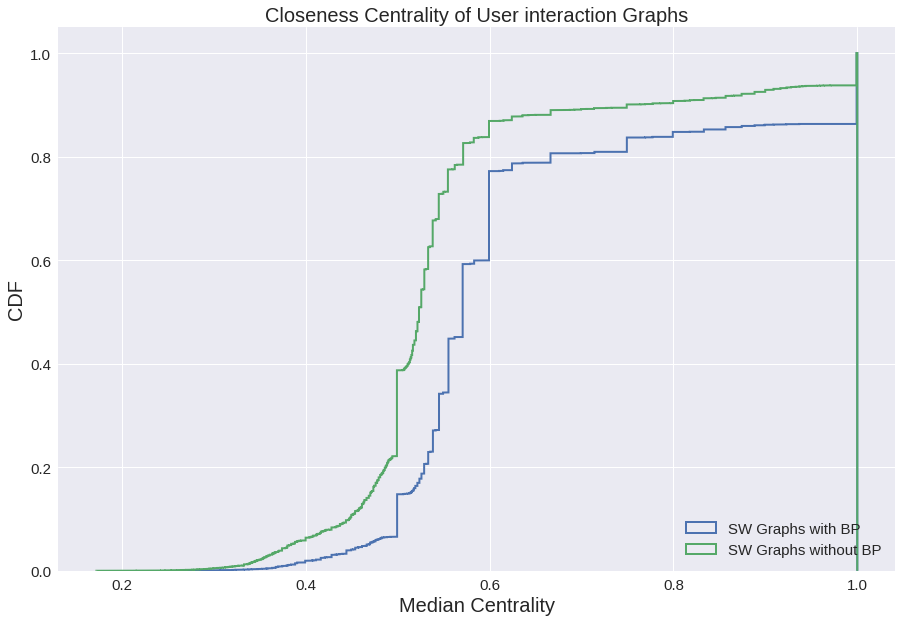

In [83]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(medianClusteringBP, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(medianClusteringSP, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Closeness Centrality of User interaction Graphs", fontsize = 20)
plt.xlabel("Median Centrality",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['SW Graphs with BP','SW Graphs without BP'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [84]:
len(BPFeats) , len(SPFeats)

(5457, 25574)

In [85]:
sampledSPFeats = random.sample(SPFeats,len(BPFeats))
# sampledBPFeats = random.sample(BPFeats,len(SPFeats))

totFeats = BPFeats + sampledSPFeats
# totFeats = sampledBPFeats + SPFeats
print len(totFeats)


10914


In [86]:
featMatrix = np.asmatrix(totFeats,dtype=float)
print featMatrix.shape
np.random.shuffle(featMatrix)

(10914, 129)


In [87]:
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [88]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(featMatrix[:,:-1], featMatrix[:,-1], test_size=0.2, random_state=9876)

clfRF = RandomForestClassifier(n_estimators=1000 , max_features = 'sqrt', random_state = 9386, n_jobs=12)
clfRF.fit(X_train, y_train)
RF_predict = clfRF.predict(X_test)

In [89]:
precision , recall , fscore , _ = precision_recall_fscore_support(y_test, RF_predict, average='binary')

print precision,recall,fscore

accuracy_score(y_test , RF_predict)

0.808823529412 0.93045112782 0.865384615385


0.85890975721484197

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(featMatrix[:,:-1])

In [92]:
print 'Explained variation per principal component: {}'.format(pca.explained_variance_ratio_)

Explained variation per principal component: [ 0.09501465  0.01331589]


In [93]:
import time

from sklearn.manifold import TSNE

n_sne = 3000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=300)
tsne_results = tsne.fit_transform(featMatrix[:10000,:-1])

print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start) 

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000330
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.644062
[t-SNE] Error after 275 iterations: 0.644062
t-SNE done! Time elapsed: 214.320403099 seconds


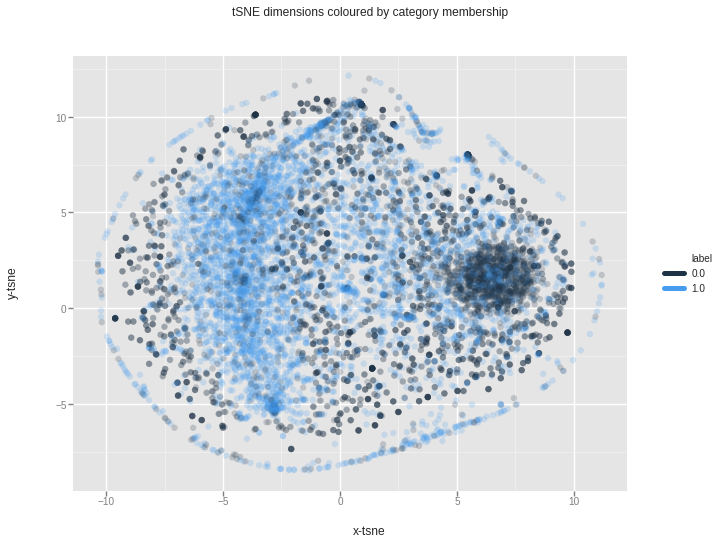

<ggplot: (8759703444725)>

In [94]:
from ggplot import *
df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = tsne_results[:10000,0]
df_tsne['y-tsne'] = tsne_results[:10000,1]
df_tsne['label'] = featMatrix[:10000,-1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) + geom_point(size=40,alpha=0.2) + ggtitle("tSNE dimensions coloured by category membership")
chart